# Machine Learning Model Serving

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import time
start = time.time()

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [6]:
def save_obj(obj, name ):
    with open('web/'+ name, 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [7]:
data = pd.read_csv('./data_f1/data_filtered.csv')

In [8]:
data.head()

,year,date,quali_pos,statusId,position,dob,driver_nationality,constructor,constructor_nationality,GP_name,country,driver,age_at_gp_in_days,driver_home,constructor_home,driver_dnf,constructor_dnf
0,2011,2011-03-27,18,11,18,1977-05-10,Ger,Alpine F1,Fre,Albert Park Grand Prix Circuit,Aus,Nick Heidfeld,12374,0,0,0,1
1,2010,2010-03-28,9,1,9,1984-12-07,Pol,Alpine F1,Fre,Albert Park Grand Prix Circuit,Aus,Robert Kubica,9242,0,0,0,0
2,2017,2017-03-26,11,11,12,1987-08-19,Ger,Alpine F1,Fre,Albert Park Grand Prix Circuit,Aus,Nico Hülkenberg,10812,0,0,0,1
3,2018,2018-03-25,7,1,8,1987-08-19,Ger,Alpine F1,Fre,Albert Park Grand Prix Circuit,Aus,Nico Hülkenberg,11176,0,0,0,0
4,2019,2019-03-17,11,11,11,1987-08-19,Ger,Alpine F1,Fre,Albert Park Grand Prix Circuit,Aus,Nico Hülkenberg,11533,0,0,0,1


In [9]:
dnf_by_driver = data.groupby('driver').sum()['driver_dnf']
driver_race_entered = data.groupby('driver').count()['driver_dnf']
driver_dnf_ratio = (dnf_by_driver/driver_race_entered)
driver_confidence = 1-driver_dnf_ratio
driver_confidence_dict = dict(zip(driver_confidence.index,driver_confidence))

In [10]:
print(driver_confidence.dtypes)

float64


In [11]:
driver_confidence

driver
Adrian Sutil          0.868421
Alexander Albon       0.972973
Alexander Rossi       1.000000
André Lotterer        1.000000
Antonio Giovinazzi    0.900000
                        ...   
Valtteri Bottas       0.958333
Vitaly Petrov         0.879310
Vitantonio Liuzzi     0.783784
Will Stevens          1.000000
Yuki Tsunoda          1.000000
Name: driver_dnf, Length: 72, dtype: float64

In [12]:
driver_confidence_dict_str = {}
for key , value in driver_confidence_dict.items():
    # Correct for New Drivers
    if value == 1.0:
        value = 0.10
    driver_confidence_dict_str[key] = np. array([value])
    print ("%s: %s" % (key, value))
    
save_obj(driver_confidence_dict_str, 'driver_dict' )

Adrian Sutil: 0.868421052631579
Alexander Albon: 0.972972972972973
Alexander Rossi: 0.1
André Lotterer: 0.1
Antonio Giovinazzi: 0.9
Brendon Hartley: 0.88
Bruno Senna: 0.8260869565217391
Carlos Sainz: 0.9069767441860466
Charles Leclerc: 0.8571428571428572
Charles Pic: 0.9487179487179487
Christian Klien: 0.1
Daniel Ricciardo: 0.9494949494949495
Daniil Kvyat: 0.9196428571428571
Esteban Gutiérrez: 0.847457627118644
Esteban Ocon: 0.935064935064935
Felipe Massa: 0.9161290322580645
Felipe Nasr: 0.925
Fernando Alonso: 0.9293478260869565
George Russell: 0.9183673469387755
Giedo van der Garde: 0.8421052631578947
Heikki Kovalainen: 0.95
Jack Aitken: 0.1
Jaime Alguersuari: 0.9210526315789473
Jarno Trulli: 0.972972972972973
Jean-Éric Vergne: 0.9137931034482758
Jenson Button: 0.9407407407407408
Jolyon Palmer: 0.8571428571428572
Jules Bianchi: 0.9117647058823529
Jérôme d'Ambrosio: 0.95
Kamui Kobayashi: 0.8356164383561644
Karun Chandhok: 0.8181818181818181
Kevin Magnussen: 0.9327731092436975
Kimi Räik

In [13]:
dnf_by_constructor = data.groupby('constructor').sum()['constructor_dnf']
constructor_race_entered = data.groupby('constructor').count()['constructor_dnf']
constructor_dnf_ratio = (dnf_by_constructor/constructor_race_entered)
constructor_reliability = 1-constructor_dnf_ratio
constructor_reliability_dict = dict(zip(constructor_reliability.index,constructor_reliability))

In [14]:
type(constructor_reliability)

pandas.core.series.Series

In [15]:
constructor_reliability

constructor
Alfa Romeo        0.419643
AlphaTauri        0.481069
Alpine F1         0.537946
Aston Martin      0.614191
Caterham          0.178571
Ferrari           0.880531
HRT               0.156522
Haas F1 Team      0.352941
Lotus             0.078947
Manor Marussia    0.121212
Marussia          0.166667
McLaren           0.610245
Mercedes          0.884701
Red Bull          0.833333
Virgin            0.092105
Williams          0.483370
Name: constructor_dnf, dtype: float64

In [16]:
constructor_reliability_dict_str = {}
for key , value in constructor_reliability_dict.items():
    # Correct value 
    constructor_reliability_dict_str[key] = np. array([value])
    #print ("%s: %s" % (key, value))
    
save_obj(constructor_reliability_dict_str, 'constructor_dict' )

## Analysis F1 Teams and Drivers Probability after last race

In [22]:
data2021 = pd.read_csv('./data_f1/data_filtered_2021.csv')

In [23]:
data2021=data2021.sort_values(by='date')
races = data2021['GP_name'].unique().tolist()
print(races)

['Bahrain International Circuit', 'Autodromo Enzo e Dino Ferrari', 'Autódromo Internacional do Algarve', 'Circuit de Barcelona-Catalunya', 'Circuit de Monaco', 'Baku City Circuit', 'Circuit Paul Ricard', 'Red Bull Ring', 'Silverstone Circuit', 'Hungaroring']


In [24]:
drivers = data2021['driver'].unique().tolist()
print(drivers)

['George Russell', 'Pierre Gasly', 'Nikita Mazepin', 'Mick Schumacher', 'Antonio Giovinazzi', 'Kimi Räikkönen', 'Lance Stroll', 'Sebastian Vettel', 'Max Verstappen', 'Sergio Pérez', 'Yuki Tsunoda', 'Lewis Hamilton', 'Esteban Ocon', 'Fernando Alonso', 'Charles Leclerc', 'Carlos Sainz', 'Lando Norris', 'Daniel Ricciardo', 'Nicholas Latifi', 'Valtteri Bottas']


In [25]:
constructors = data2021['constructor'].unique().tolist()
print(constructors)

['Williams', 'AlphaTauri', 'Haas F1 Team', 'Alfa Romeo', 'Aston Martin', 'Red Bull', 'Mercedes', 'Alpine F1', 'Ferrari', 'McLaren']


In [26]:
results = {'race': [],
          'driver':[],
          'constructor':[],
          'points':[]}
for race in races:
    for driver in drivers:
        clst = data2021.loc[(data2021['GP_name']==race)&(data2021['driver']==driver)]['constructor'].unique().tolist()
        plst = data2021.loc[(data2021['GP_name']==race)&(data2021['driver']==driver)]['points'].unique().tolist()
        for c in clst:
            for p in plst:
                results['race'].append(race)
                results['driver'].append(driver)
                results['constructor'].append(c)
                results['points'].append(p)


In [27]:
df2021= pd.DataFrame(results)
print (df2021)

                              race              driver   constructor  points
0    Bahrain International Circuit      George Russell      Williams     0.0
1    Bahrain International Circuit        Pierre Gasly    AlphaTauri     0.0
2    Bahrain International Circuit      Nikita Mazepin  Haas F1 Team     0.0
3    Bahrain International Circuit     Mick Schumacher  Haas F1 Team     0.0
4    Bahrain International Circuit  Antonio Giovinazzi    Alfa Romeo     0.0
..                             ...                 ...           ...     ...
206                    Hungaroring        Carlos Sainz       Ferrari    15.0
207                    Hungaroring        Lando Norris       McLaren     0.0
208                    Hungaroring    Daniel Ricciardo       McLaren     0.0
209                    Hungaroring     Nicholas Latifi      Williams     6.0
210                    Hungaroring     Valtteri Bottas      Mercedes     0.0

[211 rows x 4 columns]


In [29]:
print(f'Number of Races done: {len(races)}')

Number of Races done: 10


In [30]:
pts_by_driver = df2021.groupby('driver').sum()['points']
driver_race = df2021.groupby('driver').count()['race']
driver_points_ratio = (pts_by_driver/len(races)/25.0)
driver_points_dict = dict(zip(driver_points_ratio.index,driver_points_ratio))

In [31]:
driver_points_dict

{'Antonio Giovinazzi': 0.004,
 'Carlos Sainz': 0.332,
 'Charles Leclerc': 0.32,
 'Daniel Ricciardo': 0.2,
 'Esteban Ocon': 0.156,
 'Fernando Alonso': 0.152,
 'George Russell': 0.016,
 'Kimi Räikkönen': 0.008,
 'Lance Stroll': 0.07200000000000001,
 'Lando Norris': 0.452,
 'Lewis Hamilton': 0.78,
 'Max Verstappen': 0.748,
 'Mick Schumacher': 0.0,
 'Nicholas Latifi': 0.024,
 'Nikita Mazepin': 0.0,
 'Pierre Gasly': 0.2,
 'Sebastian Vettel': 0.12,
 'Sergio Pérez': 0.41600000000000004,
 'Valtteri Bottas': 0.43200000000000005,
 'Yuki Tsunoda': 0.07200000000000001}

In [32]:
pts_by_constructor = df2021.groupby('constructor').sum()['points']
constructor_race = df2021.groupby('constructor').count()['race']
constructor_pts_ratio = (pts_by_constructor/len(races)/(25.0+18.0))
constructor_points_dict = dict(zip(constructor_pts_ratio.index,constructor_pts_ratio))
#constructor_points_dict = dict(zip(pts_by_constructor.index,pts_by_constructor))

In [33]:
constructor_points_dict

{'Alfa Romeo': 0.0069767441860465115,
 'AlphaTauri': 0.15813953488372093,
 'Alpine F1': 0.17906976744186046,
 'Aston Martin': 0.11162790697674418,
 'Ferrari': 0.3790697674418605,
 'Haas F1 Team': 0.0,
 'McLaren': 0.3790697674418605,
 'Mercedes': 0.7046511627906977,
 'Red Bull': 0.6767441860465117,
 'Williams': 0.023255813953488372}

In [34]:
driver_pred_dict_str = {}
for key , value in driver_points_dict.items():
    driver_pred_dict_str[key] = np. array([value])
    #print ("%s: %s" % (key, value))

In [35]:
save_obj(driver_pred_dict_str, 'driver_pred_dict' )

In [36]:
constructor_pred_dict_str = {}
for key , value in constructor_points_dict.items():
    constructor_pred_dict_str[key] = np. array([value])
    #print ("%s: %s" % (key, value))

In [37]:
save_obj(constructor_pred_dict_str, 'constructor_pred_dict' )

## Generate Qualifying dataset for Predictor

In [39]:
qualif = {'race': [],
          'driver':[],
          'quali_pos':[]
         }
for race in races:
    for driver in drivers:
        qlst = data2021.loc[(data2021['GP_name']==race)&(data2021['driver']==driver)]['quali_pos'].unique().tolist()
        for q in qlst:
            qualif['race'].append(race)
            qualif['driver'].append(driver)
            qualif['quali_pos'].append(q)


In [40]:
qualif2021= pd.DataFrame(qualif)
print (qualif2021)

                              race              driver  quali_pos
0    Bahrain International Circuit      George Russell         15
1    Bahrain International Circuit        Pierre Gasly          5
2    Bahrain International Circuit      Nikita Mazepin         19
3    Bahrain International Circuit     Mick Schumacher         18
4    Bahrain International Circuit  Antonio Giovinazzi         12
..                             ...                 ...        ...
205                    Hungaroring        Carlos Sainz         15
206                    Hungaroring        Lando Norris          6
207                    Hungaroring    Daniel Ricciardo         11
208                    Hungaroring     Nicholas Latifi         18
209                    Hungaroring     Valtteri Bottas          2

[210 rows x 3 columns]


In [41]:
qualif2021.to_csv('./data_f1/qualif_filtered.csv', index = False)

In [42]:
# last race
last_race = races[len(races)-1]
print(last_race)

Hungaroring


In [43]:
qualif_last= qualif2021[qualif2021['race']==last_race]
print (qualif_last)

            race              driver  quali_pos
190  Hungaroring      George Russell         17
191  Hungaroring        Pierre Gasly          5
192  Hungaroring      Nikita Mazepin         19
193  Hungaroring     Mick Schumacher         20
194  Hungaroring  Antonio Giovinazzi          0
195  Hungaroring      Kimi Räikkönen         13
196  Hungaroring        Lance Stroll         12
197  Hungaroring    Sebastian Vettel         10
198  Hungaroring      Max Verstappen          3
199  Hungaroring        Sergio Pérez          4
200  Hungaroring        Yuki Tsunoda         16
201  Hungaroring      Lewis Hamilton          1
202  Hungaroring        Esteban Ocon          8
203  Hungaroring     Fernando Alonso          9
204  Hungaroring     Charles Leclerc          7
205  Hungaroring        Carlos Sainz         15
206  Hungaroring        Lando Norris          6
207  Hungaroring    Daniel Ricciardo         11
208  Hungaroring     Nicholas Latifi         18
209  Hungaroring     Valtteri Bottas    

In [44]:
qualif_last.to_csv('./data_f1/qualif_lastrace.csv', index = False)

## Generate Machine Learning Model: Random Forest 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

def save_model(model, model_filepath):
    """
    Export your model as a pickle file.
    Saves trained model as pickle file to be loaded later.
    
    """
    
    filename = model_filepath
    pickle.dump(model, open(filename, 'wb'))

In [13]:
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import cross_val_score,StratifiedKFold,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,precision_score,f1_score,recall_score
from sklearn.neural_network import MLPClassifier, MLPRegressor
plt.style.use('seaborn')


In [15]:
def position_index(x):
    if x<4:
        return 1
    if x>10:
        return 3
    else :
        return 2

In [6]:
n_estimators = [int(x) for x in np.linspace(start=200,stop=2000,num=10)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(10,110,num=11)]
min_samples_split = [2,5,8,10,15,20]
min_samples_leaf = [1,2,4,6,8,10]
bootstrap = [True,False]

random_parms = {
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
    'bootstrap':bootstrap
                }

In [9]:
# Dataset generated in previous phase
data = pd.read_csv('./data_f1/cleaned_data.csv')

In [10]:
x = data[['GP_name','quali_pos','constructor','driver','position','driver_confidence','constructor_reliability','active_driver','active_constructor']]

In [11]:
x = x[x['active_constructor']==1]
x = x[x['active_driver']==1]

In [16]:
sc  = StandardScaler()
le = LabelEncoder()
x['GP_name'] = le.fit_transform(x['GP_name'])
x['constructor'] = le.fit_transform(x['constructor'])
x['driver'] = le.fit_transform(x['driver'])
x['GP_name'] = le.fit_transform(x['GP_name'])
X = x.drop(['position','active_driver','active_constructor'],1)
y = x['position'].apply(lambda x: position_index(x))

In [17]:
rf_rand = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator=rf_rand,param_distributions=random_parms,n_iter=100,cv=10,verbose=2,n_jobs=-1)
rf_random.fit(X,y)
rf_random.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


{'n_estimators': 1600,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 60,
 'bootstrap': True}

In [18]:
rf = RandomForestClassifier(n_estimators=100,min_samples_split=20,min_samples_leaf=1,max_features='sqrt',max_depth=90,bootstrap=True)
kf = StratifiedKFold(n_splits=10,random_state=None,shuffle=False)
for train_index,test_index in kf.split(X,y):
    X_train,X_test = X.iloc[train_index],X.iloc[test_index]
    y_train,y_test = y.iloc[train_index],y.iloc[test_index]

In [19]:
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
cnf_mat_rf = confusion_matrix(y_test,y_pred_rf)
cnf_mat_rf = cnf_mat_rf/cnf_mat_rf.sum()

In [20]:
model_filepath='./models/{}.pkl'.format('RandomForestClassifier')
print('Saving model ...\n    MODEL: {}'.format(model_filepath))
save_model(rf, model_filepath)

Saving model ...
    MODEL: ./models/RandomForestClassifier.pkl


In [21]:
print(X.columns)

Index(['GP_name', 'quali_pos', 'constructor', 'driver', 'driver_confidence',
       'constructor_reliability'],
      dtype='object')


In [22]:
importances = rf.feature_importances_
importances

array([0.01743815, 0.77014187, 0.03555806, 0.01896552, 0.07645388,
       0.08144253])

# Analysis of Machine Learning Model Serving

In [16]:
import pickle

model_filepath='./models/{}.pkl'.format('RandomForestClassifier')

# load model using pickle l from disk
print('Loading model ...\n    MODEL: {}'.format(model_filepath))
loaded_model = pickle.load(open(model_filepath, 'rb'))
# model = joblib.load(model_filepath)


Loading model ...
    MODEL: ./models/RandomForestClassifier.pkl


In [17]:
importances = loaded_model.feature_importances_
importances

array([0.01631097, 0.75705978, 0.03169896, 0.03065994, 0.07847612,
       0.08579423])

In [18]:
feature_names=['GP_name', 'quali_pos', 'constructor', 'driver', 'driver_confidence',
       'constructor_reliability']

In [19]:
import time
import numpy as np

start_time = time.time()
std = np.std([
    tree.feature_importances_ for tree in loaded_model.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.010 seconds


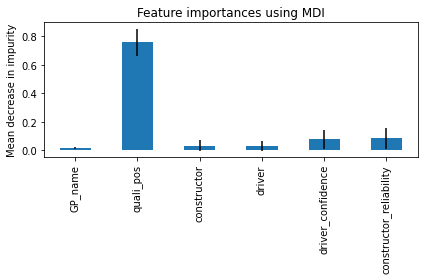

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [21]:
len(loaded_model.estimators_)

100

### The plot of first Decision Tree:

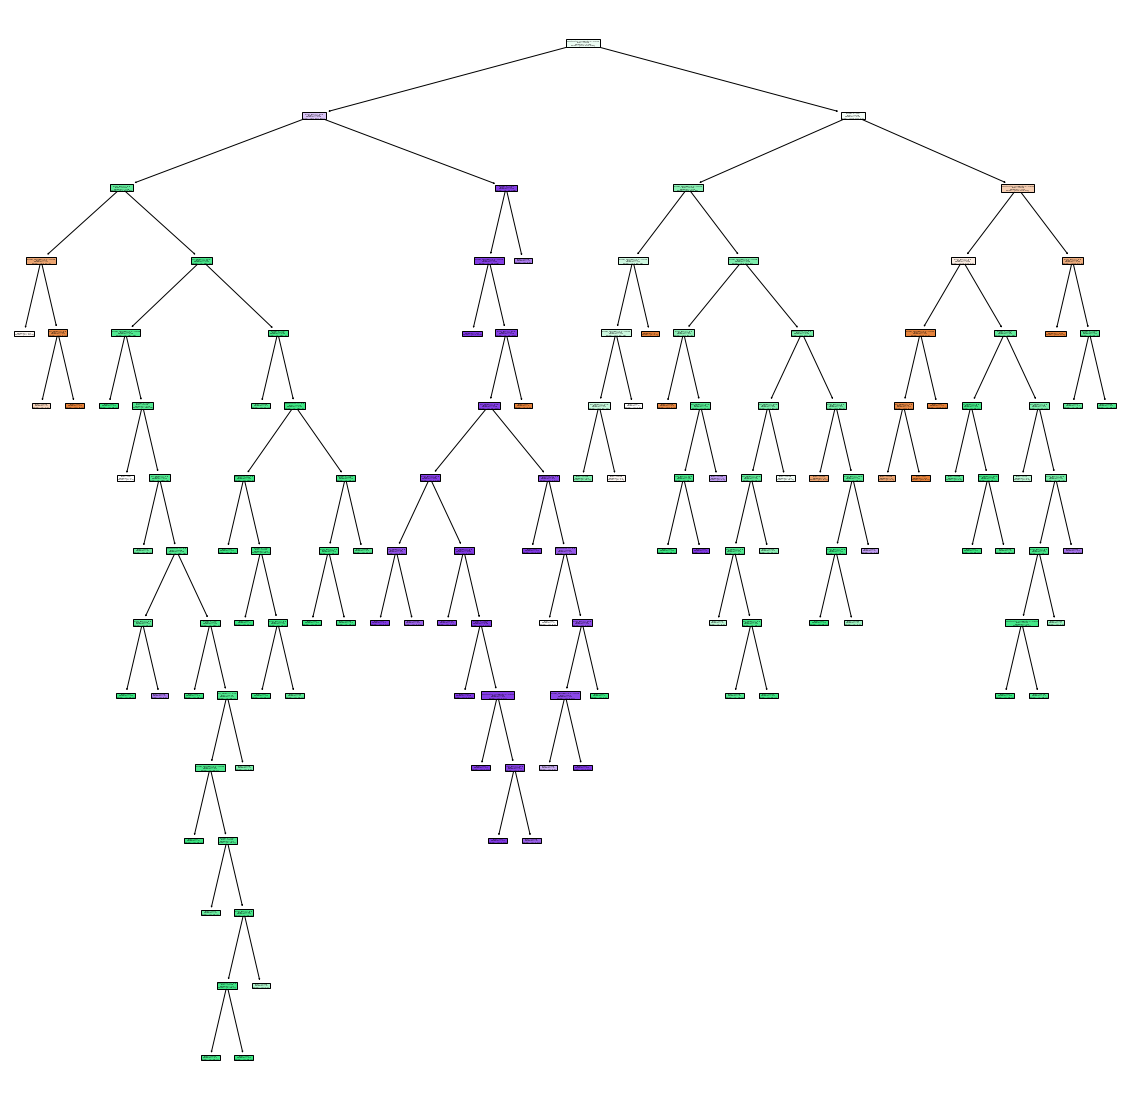

In [26]:
from sklearn import tree
plt.figure(figsize=(20,20))
_ = tree.plot_tree(loaded_model.estimators_[0], feature_names=feature_names, filled=True)

Let’s check the depth of the first tree from the Random Forest:

In [27]:
loaded_model.estimators_[0].tree_.max_depth

14

Our first tree has max_depth=14. Other trees have similar depth. You can check for the different trees.

### The plot of Second Decision Tree:

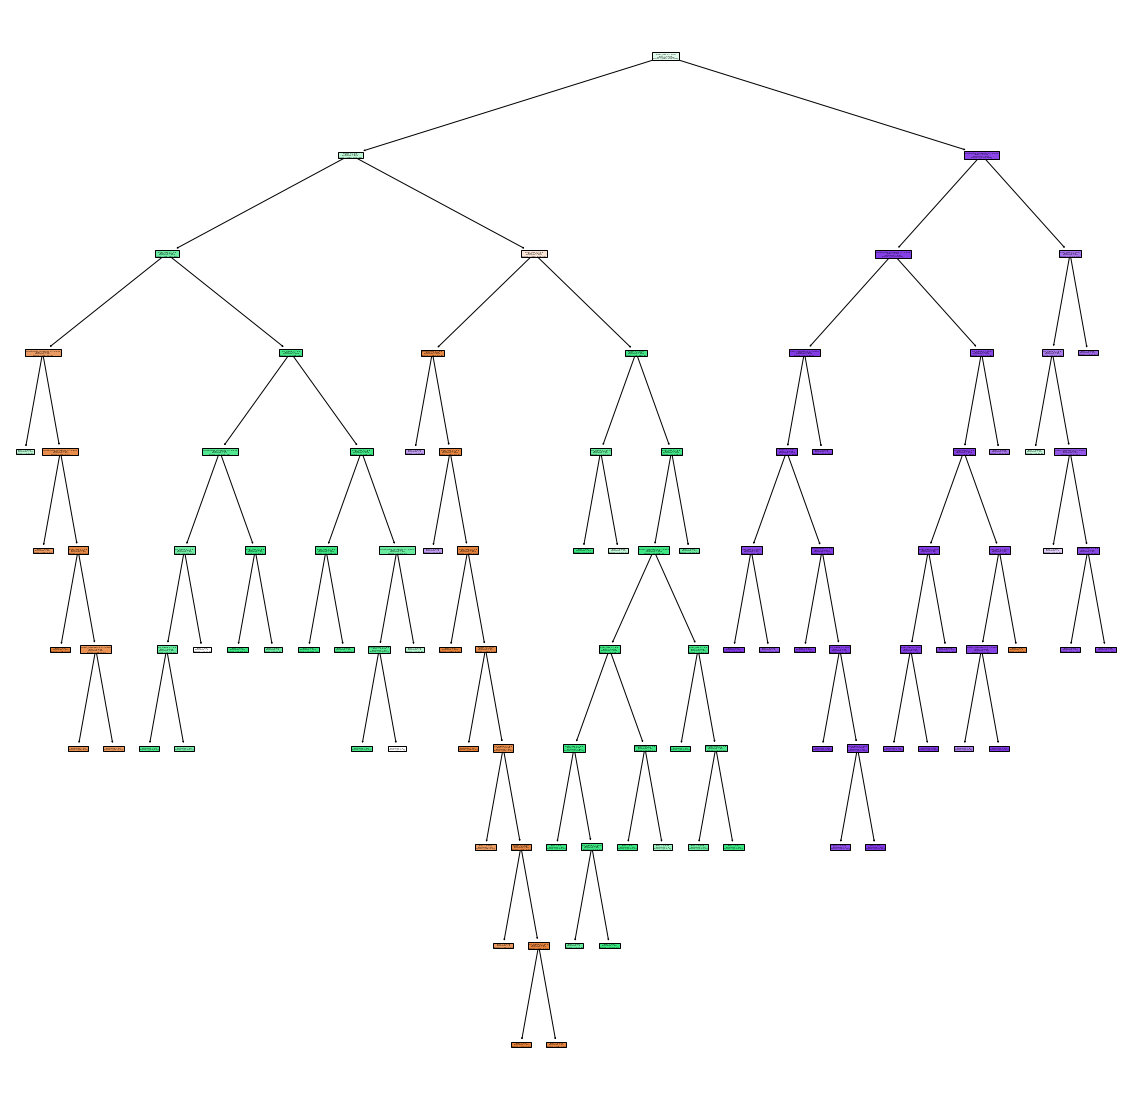

In [30]:
plt.figure(figsize=(20,20))
_ = tree.plot_tree(loaded_model.estimators_[1], feature_names=feature_names, filled=True)

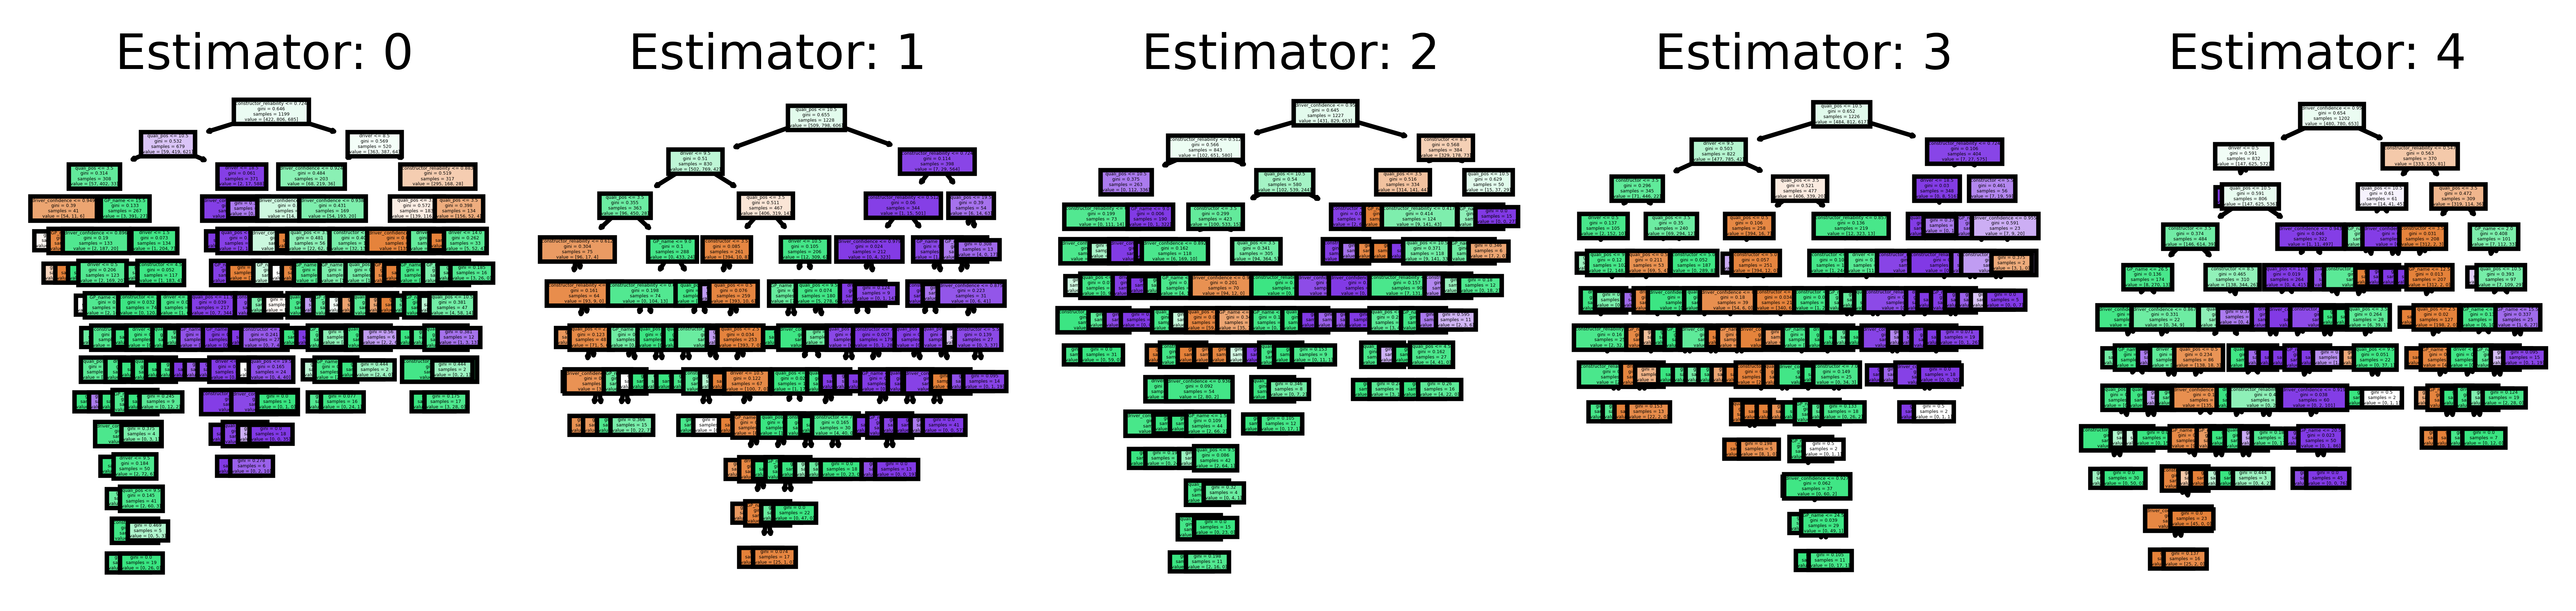

In [32]:
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(loaded_model.estimators_[index],
                   feature_names = feature_names, 
                   # class_names=cn,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)    

In [22]:
end = time.time()

In [23]:
import datetime
str(datetime.timedelta(seconds=(end - start)))

'0:00:02.814028'

In [24]:
print(str(end - start)+" seconds")

2.814028263092041 seconds


## Let's See The Results

To see the results of the lab, you'll need to start the web server using Terminal.

1. In the menu at the top of the page, select **File->New->Terminal**.
2. Enter the following commands, hitting return after each one (feel free to copy and paste)

        cd /home/opc/redbull-analytics-hol/beginners/web
        source /home/opc/redbullenv/bin/activate
        python3 app.py
3. Open a web browser to the public IP of your Jupyter Lab, but use port 8443 instead of port 8001:

        https://xxx.xxx.xxx.xxx:8443